# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

## GROUP DETAILS

1. MEMBER-1: MANAN KUMAR (SID: 862393075)
2. MEMBER-2: NITYASH GAUTAM (SID: 862395403)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [1]:
import pandas as pd

# Reading the Dataset
df = pd.read_csv('ca_dds_expenditures.csv')
df

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


                    Expenditures
Ethnicity                       
American Indian     36438.250000
Asian               18392.372093
Black               20884.593220
Hispanic            11065.569149
Multi Race           4456.730769
Native Hawaiian     42782.333333
Other                3316.500000
White not Hispanic  24697.548628


<AxesSubplot: xlabel='Ethnicity'>

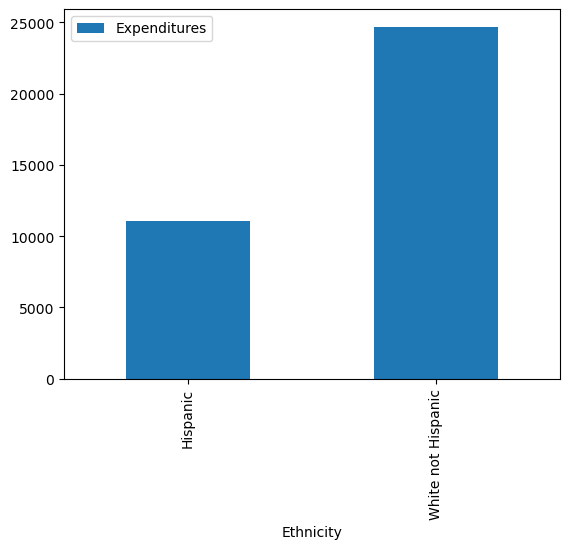

In [2]:
import numpy as np

table=pd.pivot_table(data=df,values='Expenditures',index='Ethnicity',aggfunc='mean')
print(table)
table.loc[['Hispanic','White not Hispanic']].plot.bar()

**YOUR EXPLANATION HERE**

The above graph shows that the average expenditure of Hispanics is less than the average expenditure of White non-hispanics

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

<AxesSubplot: xlabel='Ethnicity,Age Cohort'>

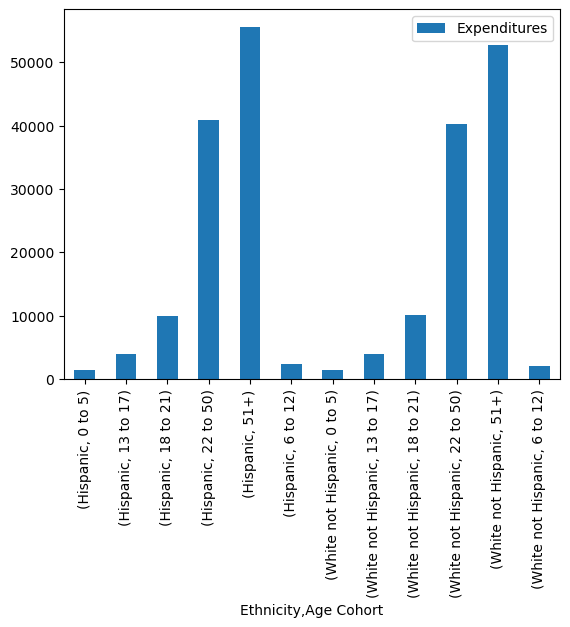

In [3]:
table2=pd.pivot_table(data=df, values='Expenditures',index=['Ethnicity','Age Cohort'],aggfunc='mean')
table2.loc[['Hispanic','White not Hispanic']].plot.bar()

**YOUR EXPLANATION HERE**

Inference from the graph is that Hispanics in each age cohort have generally a higher expenditure than White Not Hispanics

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

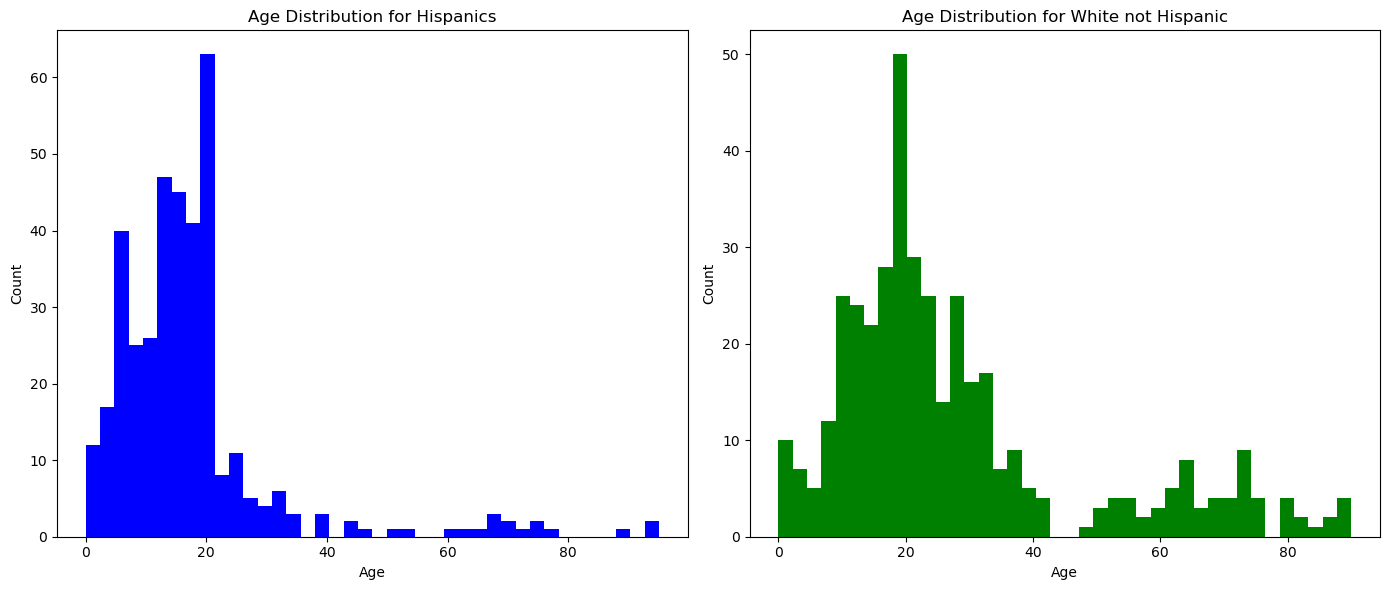

In [4]:
import matplotlib.pyplot as plt
# Initializing the Subplot details
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram plotting for Hispanics
ax1.hist(df[df['Ethnicity'] == 'Hispanic']['Age'], bins=40, color='blue')
ax1.set_title('Age Distribution for Hispanics')
ax1.set_ylabel('Count')
ax1.set_xlabel('Age')

# Histogram plotting for White (not Hispanic)
ax2.hist(df[df['Ethnicity'] == 'White not Hispanic']['Age'], bins=40, color='green')
ax2.set_title('Age Distribution for White not Hispanic')
ax2.set_ylabel('Count')
ax2.set_xlabel('Age')

plt.tight_layout()
plt.show()

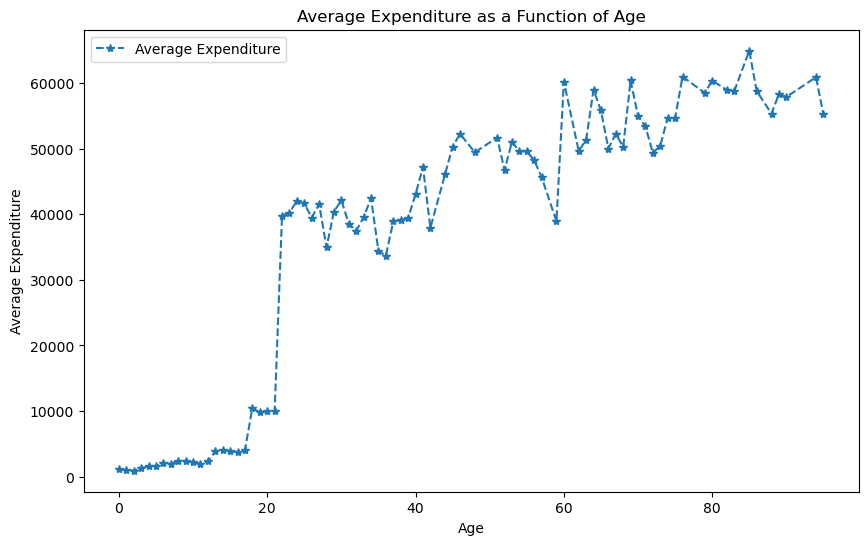

In [7]:
# Group by Age and calculate the mean expenditure for each age

ethinicity = ['Hispanic', 'White not Hispanic']
new_data = df[df['Ethnicity'].isin(ethinicity)]

t3 = pd.pivot_table(new_data, values = 'Expenditures', index = 'Age', aggfunc='mean')

####### VISUALIZATIONS #######

plt.figure(figsize=(10,6))
plt.plot(t3['Expenditures'], '--*', label='Average Expenditure')
plt.xlabel('Age')
plt.ylabel('Average Expenditure')
plt.title('Average Expenditure as a Function of Age')
plt.legend()
plt.show()

**YOUR EXPLANATION HERE**

The above visualization shows that as the age inceares the Avergae Expenditure increases as well. Now, Refering back to the previous Histograms we can clearly see that the White Not Hispanics have a higher number of people present in the higher age groups as compared to the Hispanics. This explains the discrepancy, why the White Not Hispanics had a higher Average Expenditures while per Hispanics had higher for each Age Cohorts.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload your Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab.